In [1]:
import sys
sys.path.append('../utils/')

import numpy as np
import pandas as pd

from plotting import scna_manhattan_plot

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = 'Arial'
%matplotlib inline

%load_ext autoreload
%autoreload 2

# Data

In [2]:
# clinical data
tcga_clinical_df = pd.read_csv('../data/clinical_data/tcga_train_clinical_data.csv', index_col=0)

oligo_formal_name = 'Oligodendroglioma, IDH-mutant\nand 1p/19q-codeleted'
mut_astro_formal_name = 'Astrocytoma, IDH-mutant'
wt_formal_name = 'Glioblastoma, IDH-wildtype'

replace_dict = {'Oligodendroglioma':oligo_formal_name, 
               'IDH-Mutant Astrocytoma':mut_astro_formal_name, 
               'IDH-Wildtype Glioblastoma':wt_formal_name}
tcga_clinical_df['WHO_2021_Subtype'] = tcga_clinical_df['WHO_2021_Subtype'].replace(replace_dict)

In [3]:
# Somatic copy number alteration (SCNA) data
!wget -P ../data/ https://tcga-xena-hub.s3.us-east-1.amazonaws.com/download/TCGA.GBMLGG.sampleMap%2FGistic2_CopyNumber_Gistic2_all_thresholded.by_genes.gz

scna_filepath = '../data/TCGA.GBMLGG.sampleMap%2FGistic2_CopyNumber_Gistic2_all_thresholded.by_genes.gz'
manhattan_scna_df = pd.read_csv(scna_filepath, sep='\t', index_col=0).T
manhattan_scna_df.index = manhattan_scna_df.index.str[:-3]

# gene location data
manhattan_gene_loc_df = pd.read_csv('../data/gene_data/manhattan_gene_loc.csv', index_col=0)

--2021-12-30 10:26:10--  https://tcga-xena-hub.s3.us-east-1.amazonaws.com/download/TCGA.GBMLGG.sampleMap%2FGistic2_CopyNumber_Gistic2_all_thresholded.by_genes.gz
Resolving tcga-xena-hub.s3.us-east-1.amazonaws.com (tcga-xena-hub.s3.us-east-1.amazonaws.com)... 52.217.89.128
Connecting to tcga-xena-hub.s3.us-east-1.amazonaws.com (tcga-xena-hub.s3.us-east-1.amazonaws.com)|52.217.89.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1804219 (1.7M) [binary/octet-stream]
Saving to: ‘../data/TCGA.GBMLGG.sampleMap%2FGistic2_CopyNumber_Gistic2_all_thresholded.by_genes.gz.3’

TCGA.GBMLGG.sampleM 100%[===================>]   1.72M   246KB/s    in 5.6s    

2021-12-30 10:26:16 (314 KB/s) - ‘../data/TCGA.GBMLGG.sampleMap%2FGistic2_CopyNumber_Gistic2_all_thresholded.by_genes.gz.3’ saved [1804219/1804219]



# Figure 1A

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


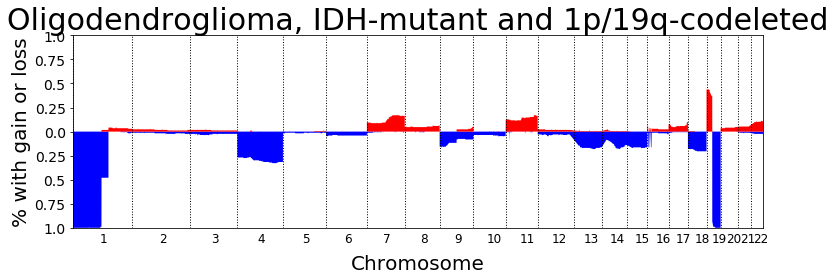

In [4]:
outfile, save = None, False
title = oligo_formal_name.replace('\n', ' ')

chroms = [str(i+1) for i in range(22)]
idxs = tcga_clinical_df.loc[tcga_clinical_df['WHO_2021_Subtype'] == oligo_formal_name].index
_ = scna_manhattan_plot(scna_df=manhattan_scna_df.loc[idxs], 
                      gene_loc_df=manhattan_gene_loc_df,
                      chroms=chroms,
                      exclude_genes=[],
                      title=title,
                      ylim=1.0,
                      chrom_label_size=12,
                      tick_size=14,
                      chrom_label_ypos=-1.15,
                      xlabel = '\nChromosome',
                      save=save,
                      title_size=30,
                      outfile=outfile,
                      figsize=(12, 4))

# Figure 1B

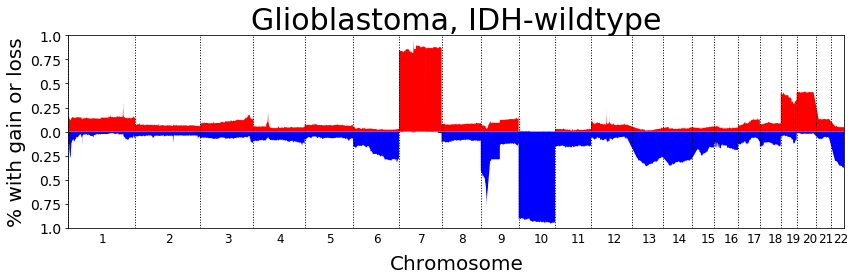

In [5]:
outfile, save = None, False
title = wt_formal_name

chroms = [str(i+1) for i in range(22)]
idxs = tcga_clinical_df.loc[tcga_clinical_df['WHO_2021_Subtype'] == wt_formal_name].index
_ = scna_manhattan_plot(scna_df=manhattan_scna_df.loc[idxs], 
                      gene_loc_df=manhattan_gene_loc_df,
                      chroms=chroms,
                      exclude_genes=[],
                      title=title,
                      ylim=1.0,
                      chrom_label_size=12,
                      tick_size=14,
                      chrom_label_ypos=-1.15,
                      xlabel = '\nChromosome',
                      save=save,
                      title_size=30,
                      outfile=outfile,
                      figsize=(12, 4))

# Figure 1C

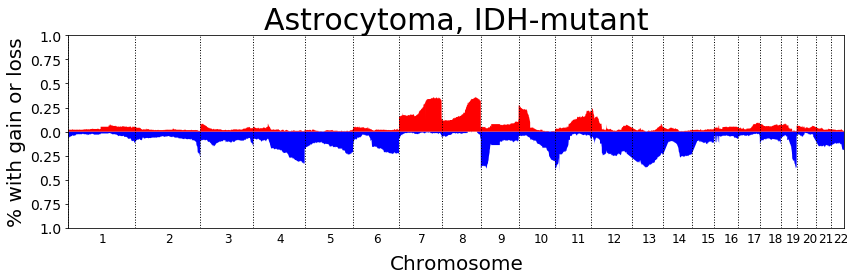

In [6]:
outfile, save = None, False
title = mut_astro_formal_name

chroms = [str(i+1) for i in range(22)]
idxs = tcga_clinical_df.loc[tcga_clinical_df['WHO_2021_Subtype'] == mut_astro_formal_name].index
_ = scna_manhattan_plot(scna_df=manhattan_scna_df.loc[idxs], 
                      gene_loc_df=manhattan_gene_loc_df,
                      chroms=chroms,
                      exclude_genes=[],
                      title=title,
                      ylim=1.0,
                      chrom_label_size=12,
                      tick_size=14,
                      chrom_label_ypos=-1.15,
                      xlabel = '\nChromosome',
                      save=save,
                      title_size=30,
                      outfile=outfile,
                      figsize=(12, 4))

# Figure 1D

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


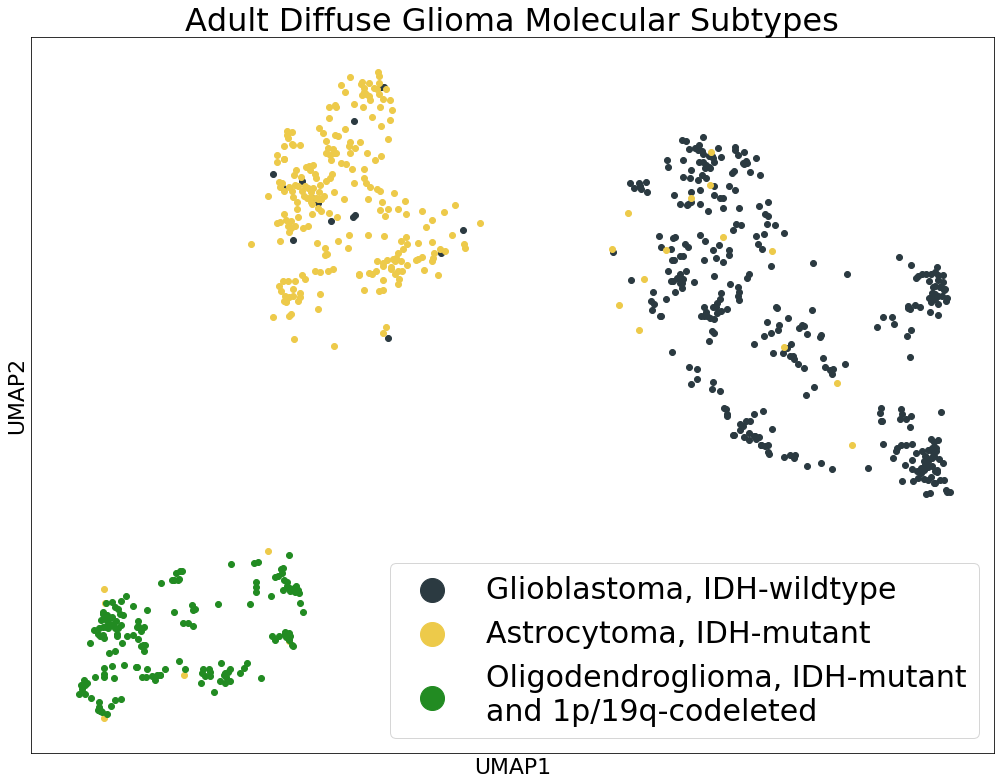

In [7]:
umap_df = pd.read_csv('../data/figure1/fig1_umap.csv', index_col=0)
color_dict = {wt_formal_name:'#2b3a41', mut_astro_formal_name:'#edca4a', oligo_formal_name:'forestgreen'}

# plot
fig, ax = plt.subplots(figsize=(14,11))

for subtype_name in [wt_formal_name, mut_astro_formal_name, oligo_formal_name]:
    subtype_idxs = tcga_clinical_df.loc[tcga_clinical_df['WHO_2021_Subtype'] == subtype_name].index
    _umap_df = umap_df.loc[subtype_idxs]
    plt.scatter(_umap_df['umap1'], _umap_df['umap2'], c=color_dict[subtype_name], label=subtype_name)
    
plt.title('Adult Diffuse Glioma Molecular Subtypes', fontsize=32)
plt.xlabel('UMAP1', fontsize=22)
plt.ylabel('UMAP2', fontsize=22)

plt.xticks([])
plt.yticks([])

plt.legend(fontsize=30, markerscale=4)
plt.tight_layout()